In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import json
from fbprophet.serialize import model_to_json, model_from_json
import warnings
warnings.filterwarnings('ignore')

In [3]:
VEGETABLE= 'onion'
df = pd.read_csv("./data/"+VEGETABLE+'_NO_OUTLIERS.csv')
df = df.drop(['Unnamed: 0'], axis= 1)
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df['MODAL'] = df['MODAL'].apply(lambda x: float(x))
df = df.set_index('DATE')
df = df.rolling(7).mean()

In [4]:
groups = df.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
years= {}
for name, group in groups:
    years[name.year] = group


In [5]:
for year in range(2010,2021):
    new_index = pd.date_range(datetime(2010,1,1), periods=len(years[year][:365])).tolist()
    years[year] = data1 = pd.DataFrame(data = years[year]['MODAL'][:365].values, index = new_index)


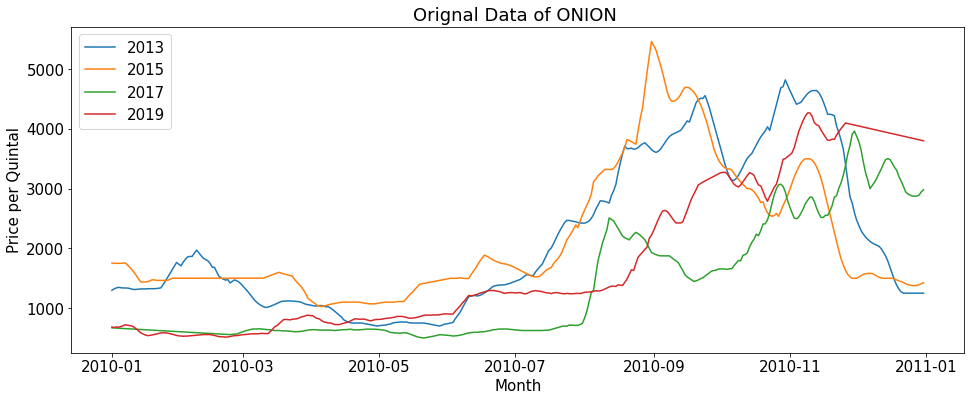

In [44]:
plt.figure(figsize=(16,6))
plt.rcParams.update({'font.size': 15})
plt.plot(years[2013],label = '2013')
plt.plot(years[2015], label= '2015')
plt.plot(years[2017], label= '2017')
plt.plot(years[2019], label= '2019')
plt.legend(loc="upper left")
plt.title("Orignal Data of ONION ")
plt.xlabel("Month")
plt.ylabel("Price per Quintal")
plt.show()

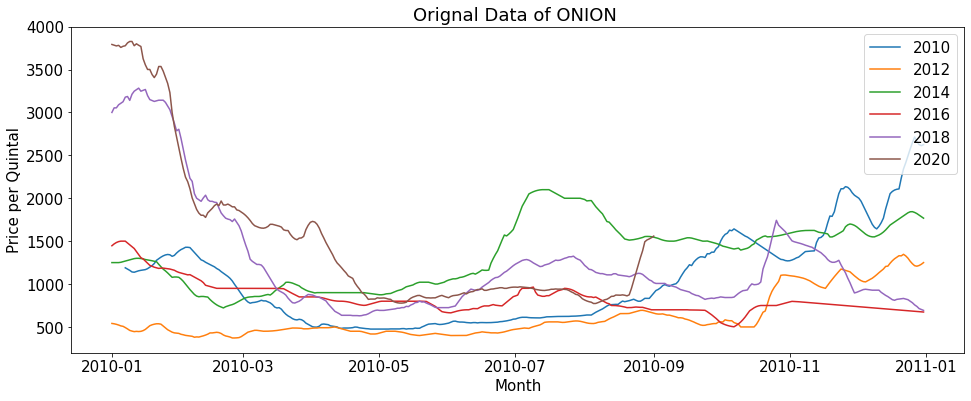

In [8]:
plt.figure(figsize=(16,6))
plt.rcParams.update({'font.size': 15})
plt.plot(years[2010],label = '2010')
plt.plot(years[2012], label= '2012')
plt.plot(years[2014], label= '2014')
plt.plot(years[2016], label= '2016')
plt.plot(years[2018], label= '2018')
plt.plot(years[2020], label= '2020')

plt.legend(loc="upper right")
plt.title("Orignal Data of ONION ")
plt.xlabel("Month")
plt.ylabel("Price per Quintal")
plt.show()

In [27]:
years[2013]

,0
2010-01-01,1337.5
2010-01-02,1375.0
2010-01-03,1375.0
2010-01-04,1375.0
2010-01-05,1300.0
...,...
2010-12-27,1250.0
2010-12-28,1250.0
2010-12-29,1250.0
2010-12-30,1250.0
